## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re

In [3]:
np.random.seed(42)

### Using the Genres datasets

Note: I took the data in the top 3 most occurring genres in my dataset. From there, I took samples of 50_000 from each genre and will be doing eda and preprocessing for those datasets here

### Importing Data

In [3]:
fiction_df = pd.read_csv('./data/fiction_sample.csv')
fiction_df.head(2)

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,ONE HUNDRED YEARS OF SOLITUDE,Lisa Sloane,5.0,THIS BOOK SHOULD BE REQUIRED READING AT EVERY ...,I was not forced to read this in higschool; I ...,"One of the 20th century's enduring works, One ...",Gabriel Garcia Marquez,http://books.google.com/books/content?id=pgPWO...,Fiction,235.0
1,Tahoe Deathfall (An Owen McKenna Mystery Thril...,Myra,5.0,"Wow, great,","Thanks for creating super characters, thrillin...","""Disaster struck when twin sisters Jennifer an...",Todd Borg,http://books.google.com/books/content?id=hSt7P...,Fiction,1.0


In [4]:
jvf_df = pd.read_csv('./data/jvf_sample.csv')
jvf_df.head(2)

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,forever,"Donna of the Lemmings ""Raised by Lemmings""",2.0,I can't believe I used to love Judy Blume,"Oh, Judy...you sure did pull the wool over my ...",As her son grows up from little boy to adult m...,Robert N. Munsch,http://books.google.com/books/content?id=7ep09...,Juvenile Fiction,346.0
1,Circus of the Darned,Erika Sorocco,5.0,Katie Maxwell Proves That She Has Bite...,"Francesca Ghetti, to-tall teenager and psychic...",As Fran travels around Europe with the GothFai...,Katie Maxwell,http://books.google.com/books/content?id=UVHwA...,Juvenile Fiction,1.0


In [5]:
bio_df = pd.read_csv('./data/bio_sample.csv')
bio_df.head(2)

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,Christ stopped at Eboli: The story of a year,"John J. Dalesandro ""banjo picker""",5.0,Italian book,I ordered the book for my mother. She specific...,"It was to Lucania, a desolate land in southern...",Carlo Levi,http://books.google.com/books/content?id=QyoKm...,Biography & Autobiography,NaN
1,Magic Time,Ross C. Reeves,5.0,A Must Read,Very few novels capture the ambivalent relatio...,“Is there anybody that Hawk Koch hasn’t worked...,"Hawk Koch, Molly Jordan",http://books.google.com/books/content?id=SOGvD...,Biography & Autobiography,NaN


In [6]:
unique_data = pd.DataFrame(columns = ['Titles', 'Authors'])
unique_data.loc['Fiction'] = [fiction_df['Title'].nunique(), fiction_df['authors'].nunique()]
unique_data.loc['Juvenile Fiction'] = [jvf_df['Title'].nunique(), jvf_df['authors'].nunique()]
unique_data.loc['Biography & Autobiography'] = [bio_df['Title'].nunique(), bio_df['authors'].nunique()]

Evaluation: Looking at the number of unique authors in each dataframe, they're very bias. For example, there are 2907 unique authors in and 4615 titles for Juvenile Fiction out of 50,000 rows of data.

In [7]:
unique_data

,Titles,Authors
Fiction,9379,5409
Juvenile Fiction,4615,2907
Biography & Autobiography,5075,4425


### Comparison of Top N-Grams

In [8]:
def my_lemmatizer(text):
    wnet = WordNetLemmatizer()
    # exclude words with apostrophes and numbers
    return [wnet.lemmatize(w) for w in text.split() if "'" not in w and not w.isdigit()]

In [9]:
wnet = WordNetLemmatizer()
lem_stopwords = [wnet.lemmatize(w) for w in stopwords.words('english')]

contractions = ['ve', 't', "'s'", 'd', 'll', 'm', 're']
lem_contractions = [wnet.lemmatize(contraction) for contraction in contractions]

numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
lem_numbers = [wnet.lemmatize(num) for num in numbers]

lem_stopwords = lem_stopwords + lem_contractions + lem_numbers

In [10]:
def my_preprocessor(text):
    text = text.lower()
    text = re.sub('\\n', '', text)
    text = re.findall("[\w']+|\$[\d\.]+", text)
    text = ' '.join(text)
    
    return text

In [11]:
bigram_cvec = CountVectorizer(
    stop_words=lem_stopwords,
    tokenizer=my_lemmatizer,
    preprocessor=my_preprocessor,
    ngram_range = (2,2),
    max_features = 10_000,
    token_pattern = None
    )

In [12]:
trigram_cvec = CountVectorizer(
    stop_words=lem_stopwords,
    tokenizer=my_lemmatizer,
    preprocessor=my_preprocessor,
    ngram_range = (3,3),
    max_features = 10_000,
    token_pattern = None
    )

### Bigrams and Trigrams for Fiction Dataset

In [61]:
bigram_fic_desc = bigram_cvec.fit_transform(fiction_df['description'])
cv_bigram_fic_desc = pd.DataFrame(bigram_fic_desc.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_fic_desc  = trigram_cvec.fit_transform(fiction_df['description'])
cv_trigram_fic_desc = pd.DataFrame(trigram_fic_desc.todense(), columns = trigram_cvec.get_feature_names_out())

In [63]:
bigram_fic_rev = bigram_cvec.fit_transform(fiction_df['review/text'])
cv_bigram_fic_rev = pd.DataFrame(bigram_fic_rev.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_fic_rev  = trigram_cvec.fit_transform(fiction_df['review/text'])
cv_trigram_fic_rev = pd.DataFrame(trigram_fic_rev.todense(), columns = trigram_cvec.get_feature_names_out())

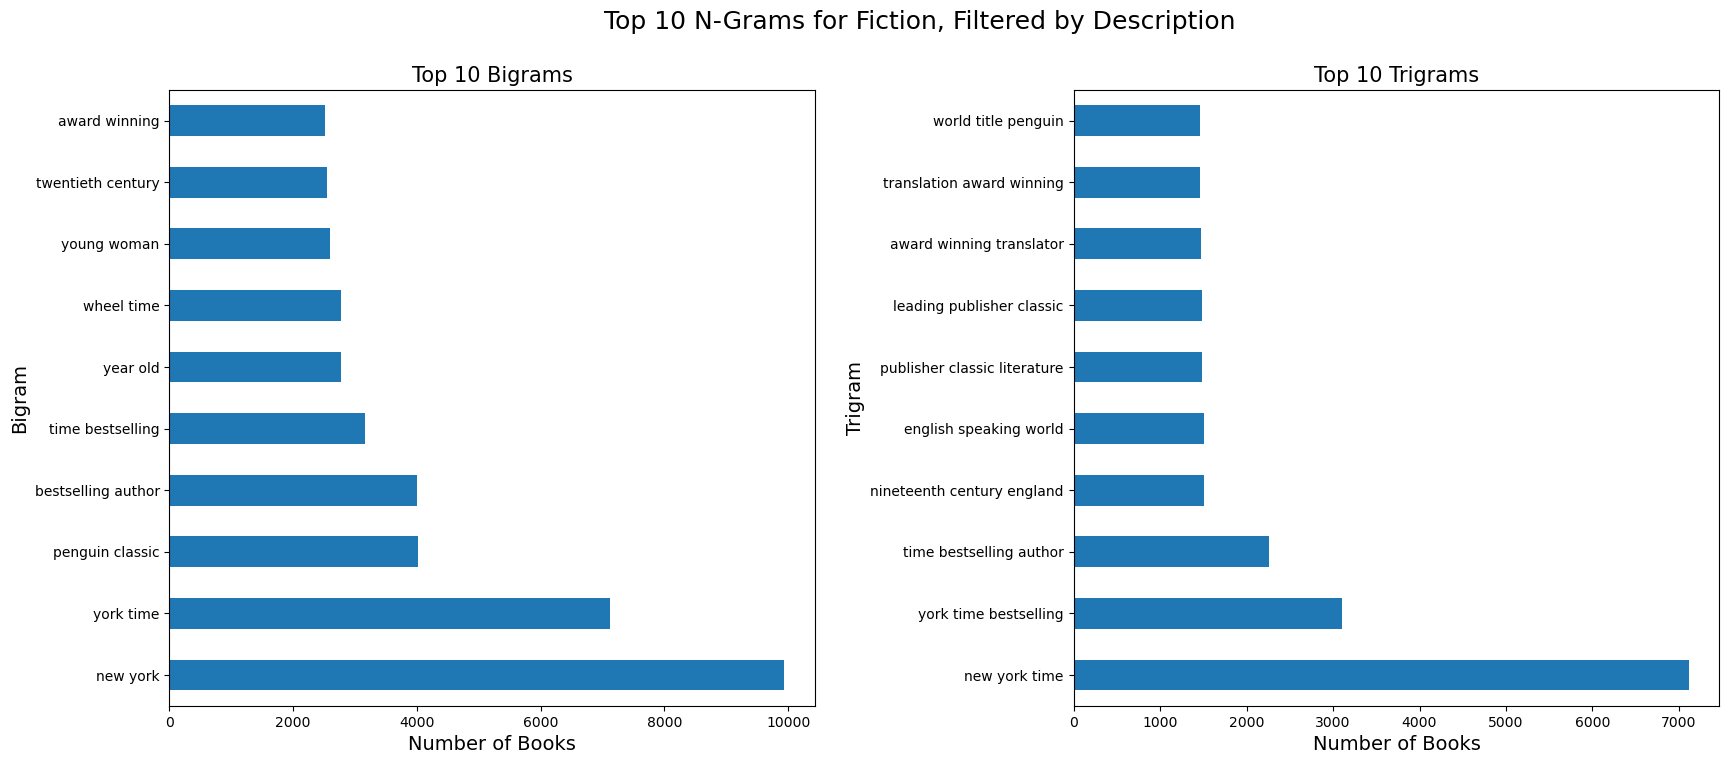

In [75]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Fiction, Filtered by Description', fontsize = 18)

fic_desc_bigrams = cv_bigram_fic_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
fic_desc_trigrams = cv_trigram_fic_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

fic_desc_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
fic_desc_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

fic_desc_bigrams.set_xlabel('Number of Books', fontsize = 14)
fic_desc_trigrams.set_xlabel('Number of Books', fontsize = 14)

fic_desc_bigrams.set_ylabel('Bigram', fontsize = 14)
fic_desc_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

#plt.tight_layout()
#plt.savefig('')

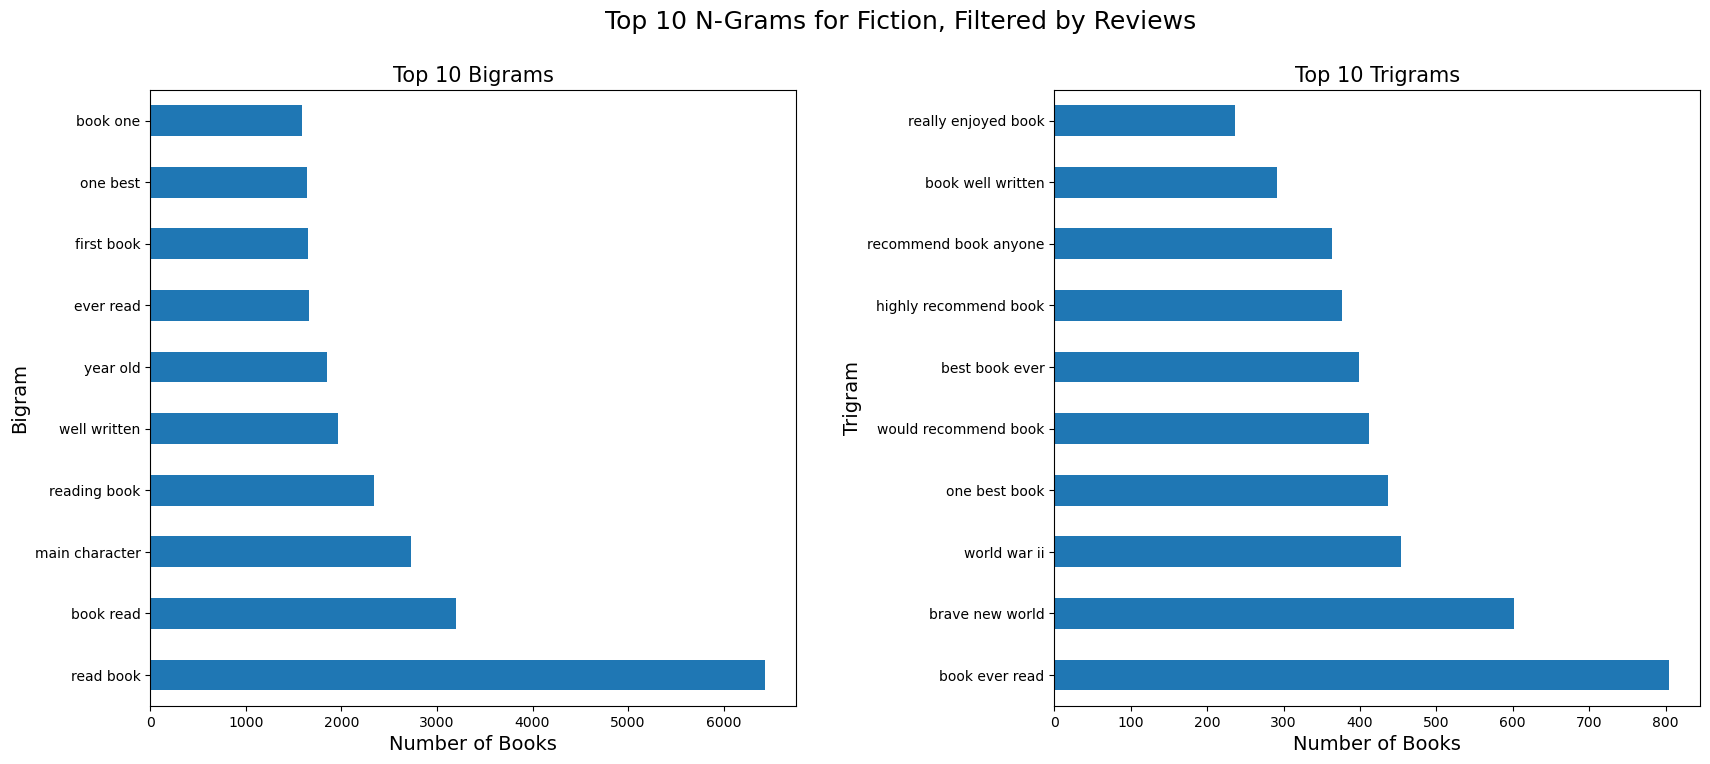

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Fiction, Filtered by Reviews', fontsize = 18)

fic_rev_bigrams = cv_bigram_fic_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
fic_rev_trigrams = cv_trigram_fic_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

fic_rev_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
fic_rev_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

fic_rev_bigrams.set_xlabel('Number of Books', fontsize = 14)
fic_rev_trigrams.set_xlabel('Number of Books', fontsize = 14)

fic_rev_bigrams.set_ylabel('Bigram', fontsize = 14)
fic_rev_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

### Bigrams and Trigrams for Juvenile Fiction Dataset

In [73]:
bigram_jvf_desc = bigram_cvec.fit_transform(jvf_df['description'])
cv_bigram_jvf_desc = pd.DataFrame(bigram_jvf_desc.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_jvf_desc  = trigram_cvec.fit_transform(jvf_df['description'])
cv_trigram_jvf_desc = pd.DataFrame(trigram_jvf_desc.todense(), columns = trigram_cvec.get_feature_names_out())

In [74]:
bigram_jvf_rev = bigram_cvec.fit_transform(jvf_df['review/text'])
cv_bigram_jvf_rev = pd.DataFrame(bigram_jvf_rev.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_jvf_rev  = trigram_cvec.fit_transform(jvf_df['review/text'])
cv_trigram_jvf_rev = pd.DataFrame(trigram_jvf_rev.todense(), columns = trigram_cvec.get_feature_names_out())

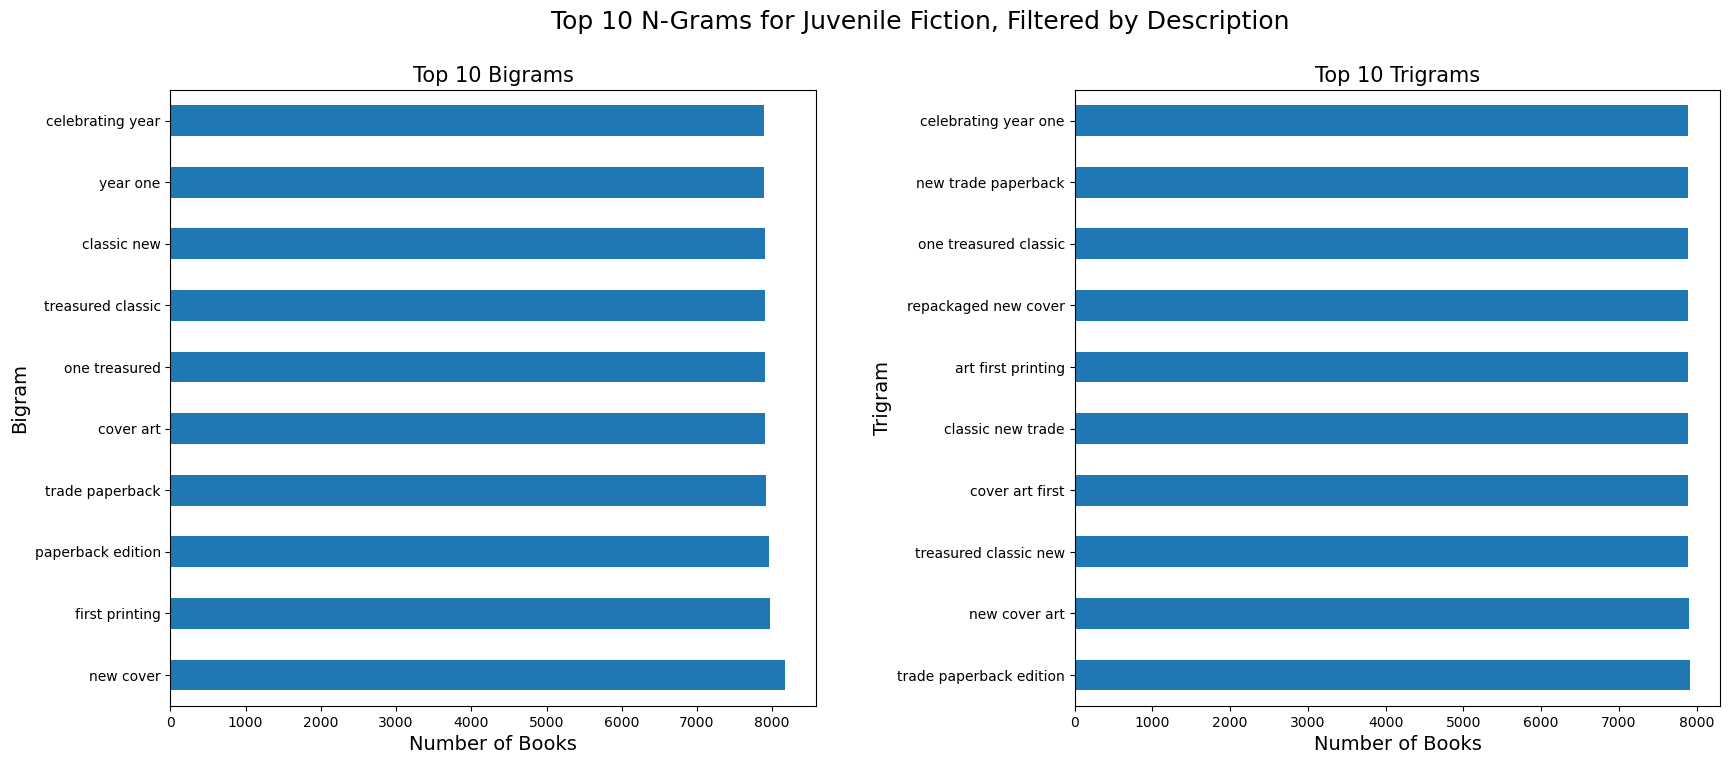

In [76]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Juvenile Fiction, Filtered by Description', fontsize = 18)

jvf_desc_bigrams = cv_bigram_jvf_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
jvf_desc_trigrams = cv_trigram_jvf_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

jvf_desc_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
jvf_desc_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

jvf_desc_bigrams.set_xlabel('Number of Books', fontsize = 14)
jvf_desc_trigrams.set_xlabel('Number of Books', fontsize = 14)

jvf_desc_bigrams.set_ylabel('Bigram', fontsize = 14)
jvf_desc_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

#plt.tight_layout()
#plt.savefig('')

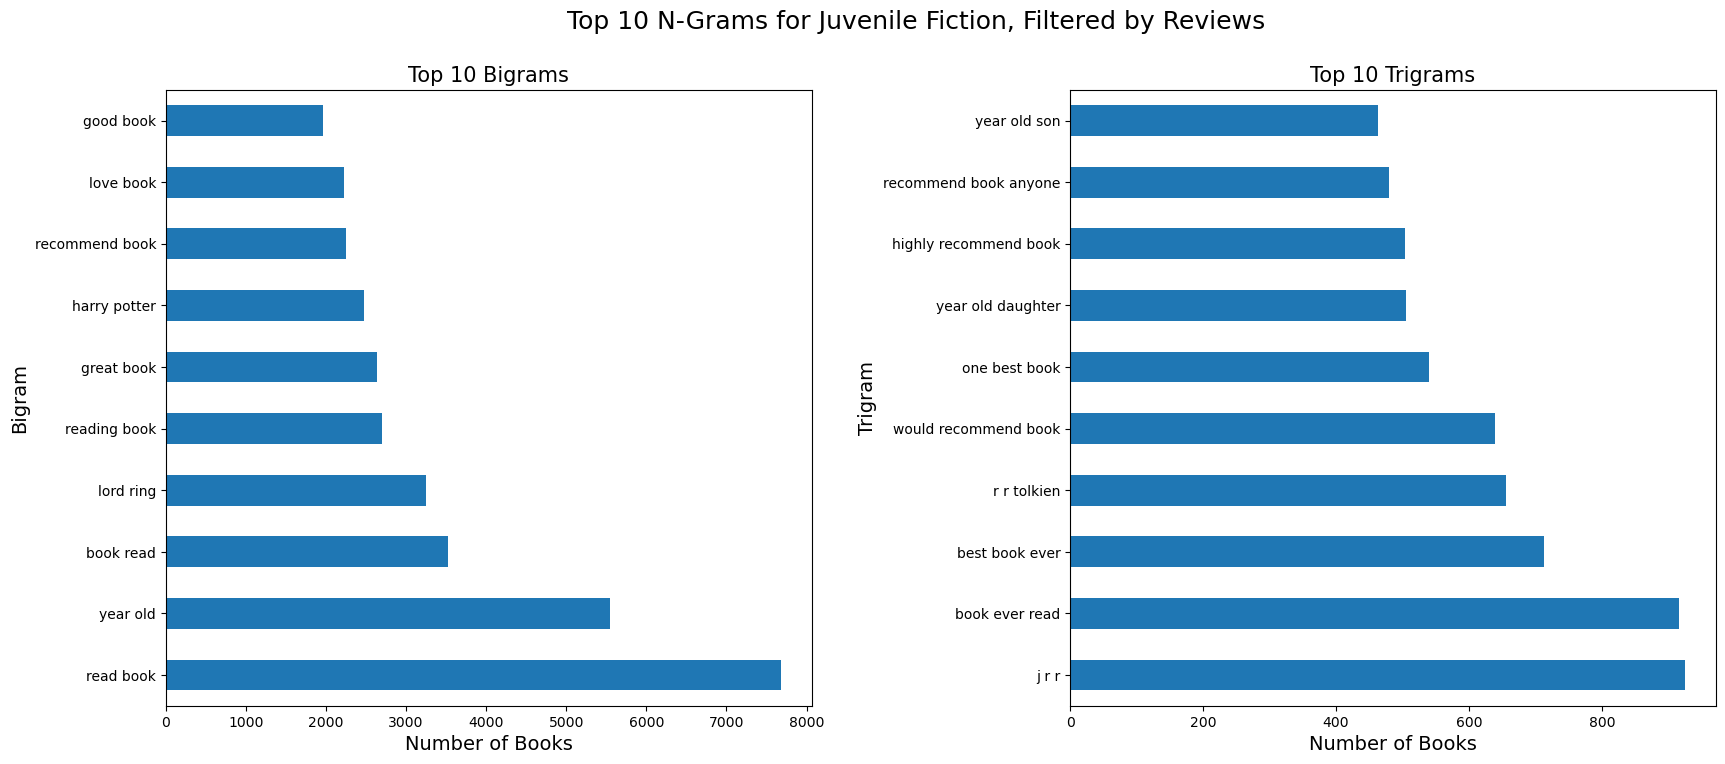

In [77]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Juvenile Fiction, Filtered by Reviews', fontsize = 18)

jvf_rev_bigrams = cv_bigram_jvf_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
jvf_rev_trigrams = cv_trigram_jvf_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

jvf_rev_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
jvf_rev_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

jvf_rev_bigrams.set_xlabel('Number of Books', fontsize = 14)
jvf_rev_trigrams.set_xlabel('Number of Books', fontsize = 14)

jvf_rev_bigrams.set_ylabel('Bigram', fontsize = 14)
jvf_rev_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

#plt.tight_layout()
#plt.savefig('')

### Bigrams and Trigrams for Biography & Autobiography Dataset

In [13]:
bigram_bio_desc = bigram_cvec.fit_transform(bio_df['description'])
cv_bigram_bio_desc = pd.DataFrame(bigram_bio_desc.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_bio_desc  = trigram_cvec.fit_transform(bio_df['description'])
cv_trigram_bio_desc = pd.DataFrame(trigram_bio_desc.todense(), columns = trigram_cvec.get_feature_names_out())

In [14]:
bigram_bio_rev = bigram_cvec.fit_transform(bio_df['review/text'])
cv_bigram_bio_rev = pd.DataFrame(bigram_bio_rev.todense(), columns = bigram_cvec.get_feature_names_out())

trigram_bio_rev  = trigram_cvec.fit_transform(bio_df['review/text'])
cv_trigram_bio_rev = pd.DataFrame(trigram_bio_rev.todense(), columns = trigram_cvec.get_feature_names_out())

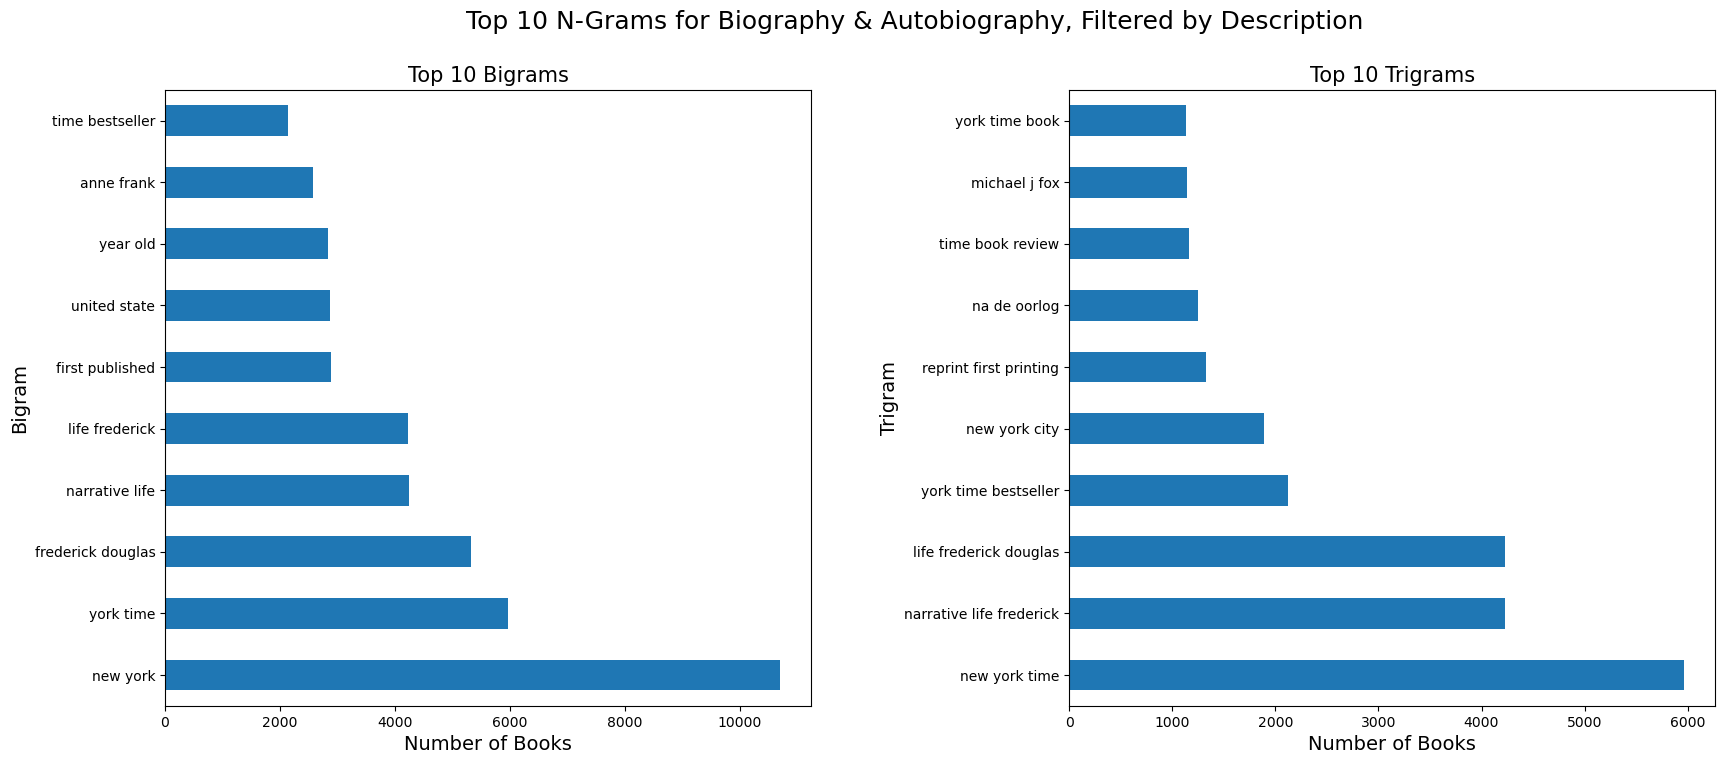

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Biography & Autobiography, Filtered by Description', fontsize = 18)

bio_desc_bigrams = cv_bigram_bio_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
bio_desc_trigrams = cv_trigram_bio_desc.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

bio_desc_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
bio_desc_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

bio_desc_bigrams.set_xlabel('Number of Books', fontsize = 14)
bio_desc_trigrams.set_xlabel('Number of Books', fontsize = 14)

bio_desc_bigrams.set_ylabel('Bigram', fontsize = 14)
bio_desc_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

#plt.tight_layout()
#plt.savefig('')

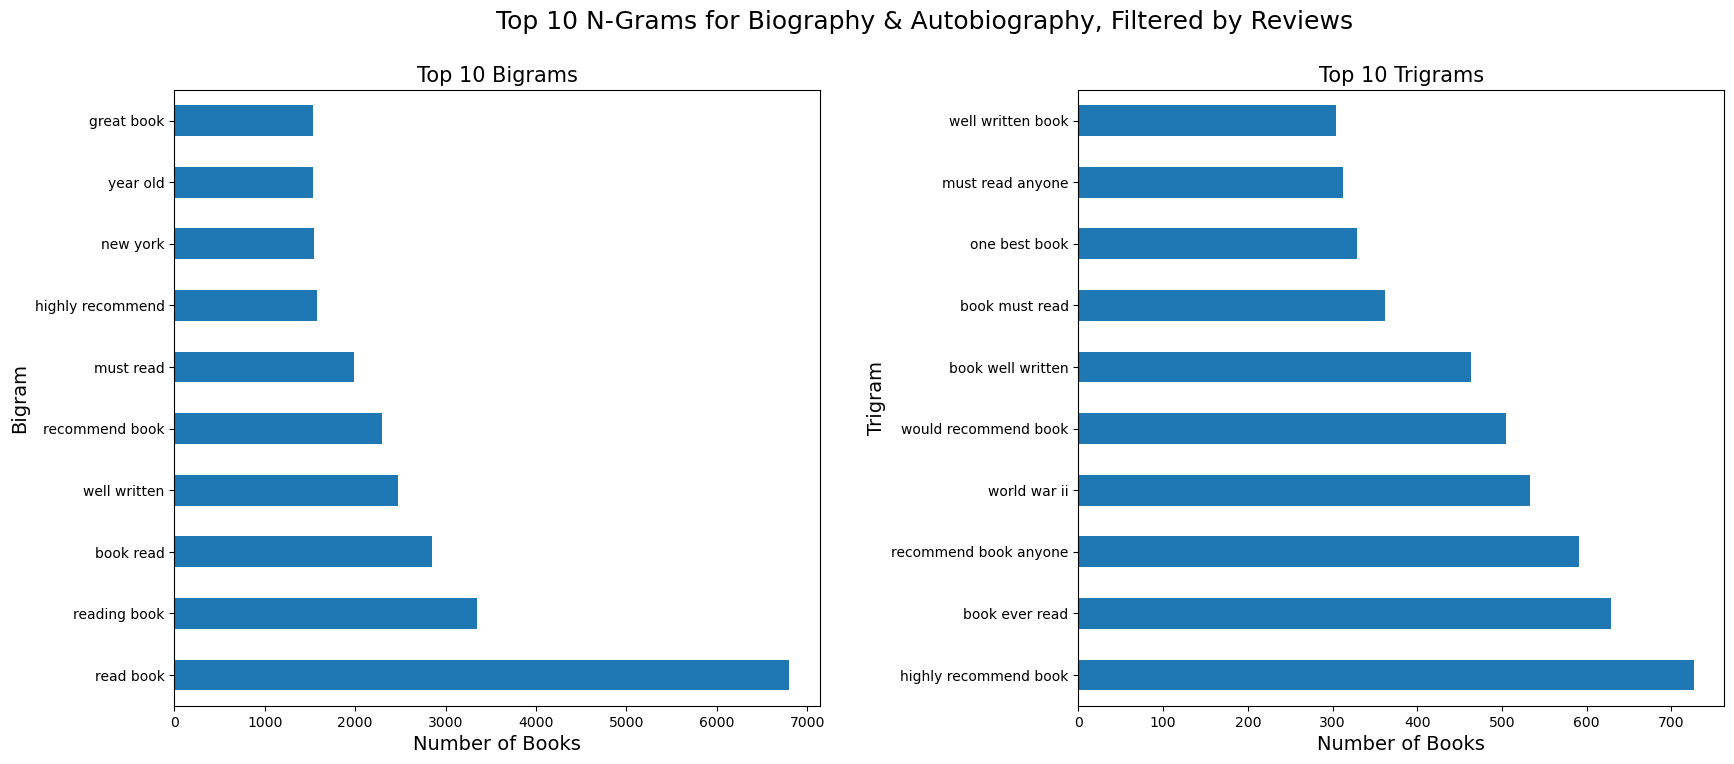

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('Top 10 N-Grams for Biography & Autobiography, Filtered by Reviews', fontsize = 18)

bio_rev_bigrams = cv_bigram_bio_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[0])
bio_rev_trigrams = cv_trigram_bio_rev.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', ax=ax[1])

bio_rev_bigrams.set_title('Top 10 Bigrams', fontsize = 15)
bio_rev_trigrams.set_title('Top 10 Trigrams', fontsize = 15)

bio_rev_bigrams.set_xlabel('Number of Books', fontsize = 14)
bio_rev_trigrams.set_xlabel('Number of Books', fontsize = 14)

bio_rev_bigrams.set_ylabel('Bigram', fontsize = 14)
bio_rev_trigrams.set_ylabel('Trigram', fontsize = 14)

plt.subplots_adjust(wspace=0.4);

#plt.tight_layout()
#plt.savefig('')

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
sent = SentimentIntensityAnalyzer()
def sentiment_score(text):
    sentiment_score = sent.polarity_scores(text)
    sentiment_value = ''
    
    if sentiment_score['compound'] > 0:
        sentiment_value = 'positive'
    elif sentiment_score['compound'] < 0:
        sentiment_value = 'negative' 
    elif sentiment_score['compound'] == 0:
        sentiment_value = 'neutral'  
 
    return sentiment_value

In [27]:
fiction_df['review_sentiment'] = fiction_df['review/text'].apply(sentiment_score)
jvf_df['review_sentiment'] = jvf_df['review/text'].apply(sentiment_score)
bio_df['review_sentiment'] = bio_df['review/text'].apply(sentiment_score)

In [21]:
fiction_counts = fiction_df['review_sentiment'].value_counts()
jvf_counts = jvf_df['review_sentiment'].value_counts()
bio_counts = bio_df['review_sentiment'].value_counts()

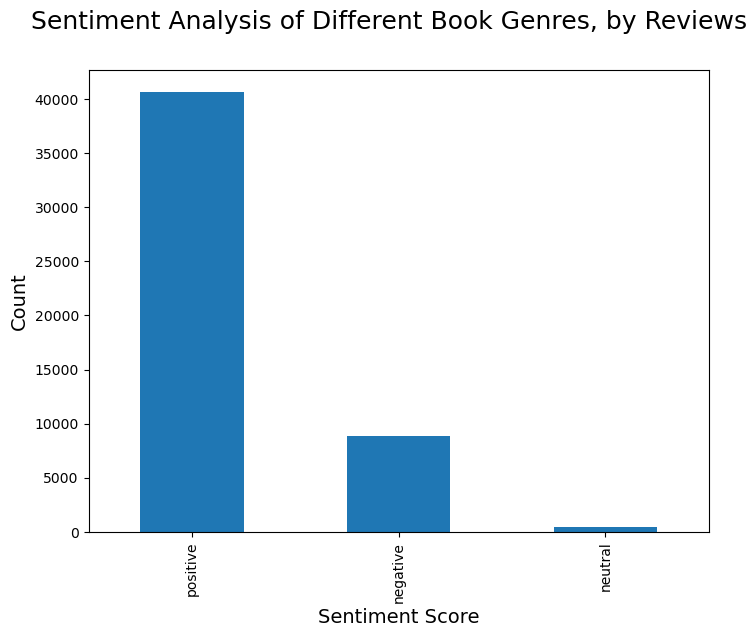

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Sentiment Analysis of Different Book Genres, by Reviews', fontsize=18)

# Assuming you have calculated sentiment scores and assigned them to the respective dataframes
fiction_df['review_sentiment'] = fiction_df['review/text'].apply(sentiment_score)
jvf_df['review_sentiment'] = jvf_df['review/text'].apply(sentiment_score)
bio_df['review_sentiment'] = bio_df['review/text'].apply(sentiment_score)

# Perform sentiment analysis and plot the sentiment distribution for the fiction genre
fic_sent = fiction_df['review_sentiment'].value_counts().sort_values(ascending=False).head(10)
fic_sent.plot(kind='bar', ax=ax)

ax.set_xlabel('Sentiment Score', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

AttributeError: 'BarContainer' object has no attribute 'figure'

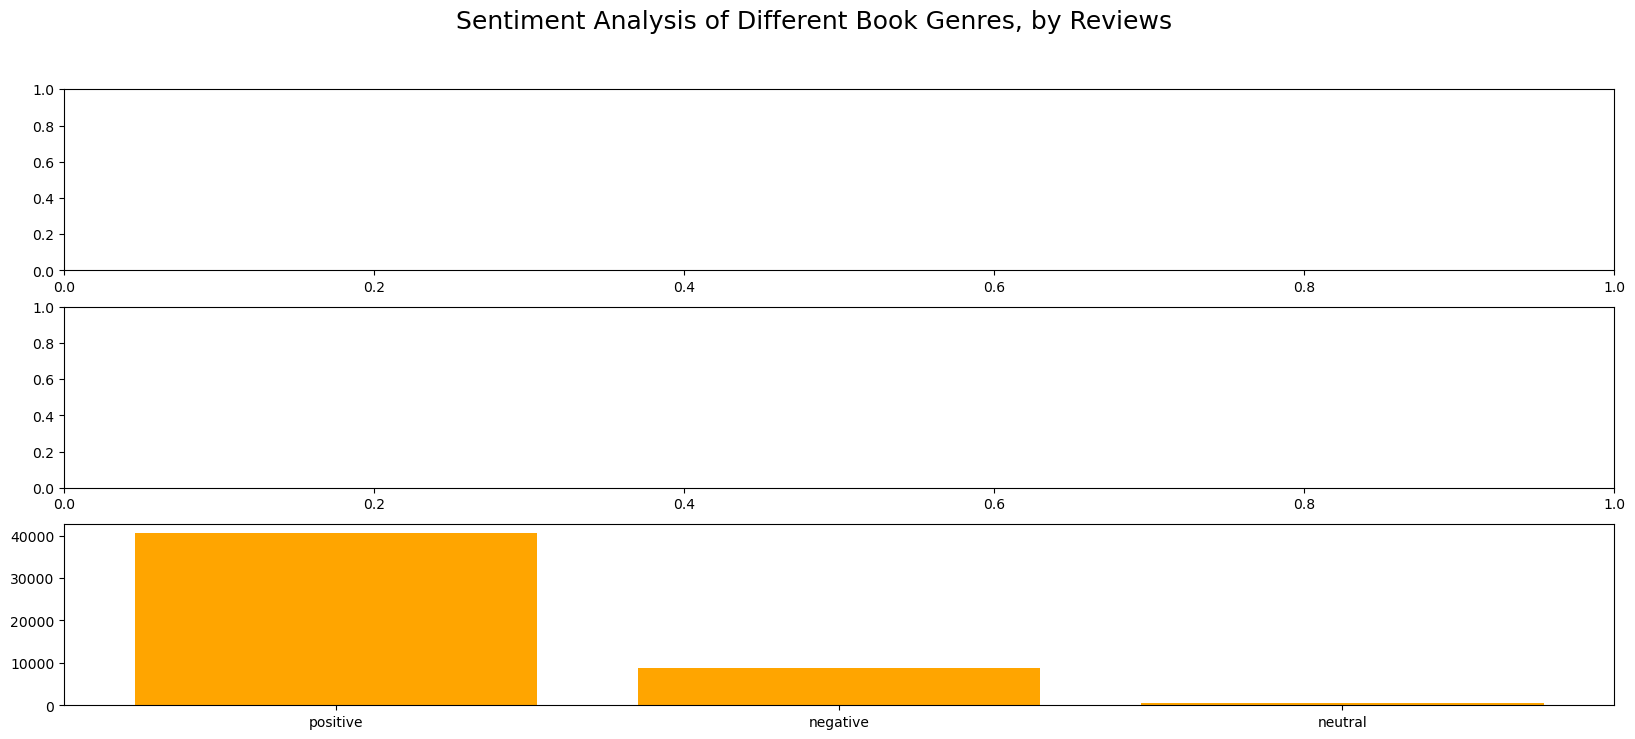

In [29]:
fig, ax = plt.subplots(3, 1, figsize = (20, 8))
fig.suptitle('Sentiment Analysis of Different Book Genres, by Reviews', fontsize = 18)

fiction = plt.bar(fiction_counts.index, fiction_counts.values, color='orange')
fiction.figure(figsize = (12,5))

fiction.title('Fiction Genre', size = 15)
fiction.xlabel('Sentiment Score', size = 13)
fiction.xticks(fontsize = 15)
fiction.ylabel('Number of Posts', size = 13)
fiction.yticks(fontsize = 15);

#plt.tight_layout()
#plt.savefig('')